<a href="https://colab.research.google.com/github/manapislambek/ML-Projects/blob/main/CS_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Concrete Compressive Strength Using Random Forest Model  
### By **Islambek Manap** | Sep 2025

# Table of Contents
### Introduction
### 1. Load and Explore the Data  
### 2. Train Linear Regression Model  
### 3. Model Evaluation  
### 4. Feature Importance  
### 5. Visualize Predictions  
### 6. Predict with Custom Input  

# Introduction
In this project, we aim to predict the compressive strength of concrete using machine learning technique - **Random Forest Model.** **Compressive strength** is a critical mechanical property in structural engineering, reflecting how much load a concrete mixture can bear before failing. Accurate prediction of this property is essential for ensuring the safety and performance of construction materials.

The dataset used in this study is sourced from Kaggle and contains **1,030 samples** of concrete mixes, each characterized by **eight input variables**:

- Cement
- Blast Furnace Slag
- Fly Ash
- Water
- Superplasticizer
- Coarse Aggregate
- Fine Aggregate
- Age (in days)

The **target variable** is the **compressive strength** of concrete, measured in MPa. The goal is to build a regression model that learns the relationship between mix proportions and compressive strength, allowing us to predict strength for new, unseen mixtures.

This problem is particularly relevant to the field of civil and materials engineering, and it serves as a practical example of how machine learning can assist in optimizing material design and quality control in concrete production.

In [3]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
drive.mount('/content/drive')

Mounted at /content/drive


📊 1. Load and Export Data Set

In [5]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Research/Study/ML/ML Projects/Data for Study/CCS.csv')

# Define features (all except the target)
X = df.drop("Concrete compressive strength ", axis=1)

# Define target
y = df["Concrete compressive strength "]

In [6]:
# Statistical Description of Data -> Scaling is neededz
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


🧠 2. Train Random Forest Model

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit Model and make prediction
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

📈 3. Model Evaluation

In [13]:
#  Evaluate model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 26.958024156302006
R² Score: 0.8965922146814175


📌 4. Feature Importance

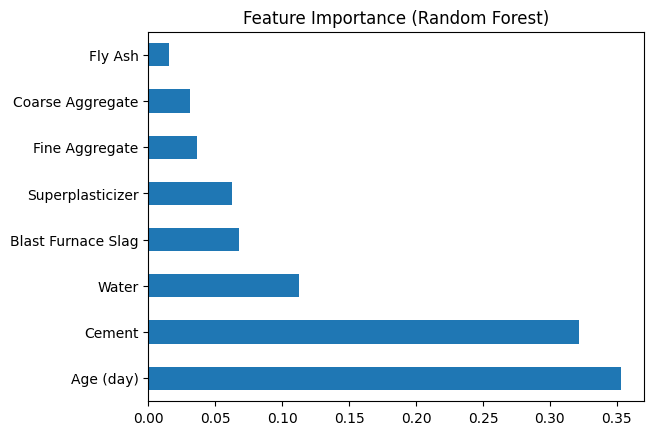

In [14]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

feat_imp.plot(kind='barh')
plt.title("Feature Importance (Random Forest)")
plt.show()


# **Explanation of Feature Importance**

In the Random Forest model, feature importance values represent the relative contribution of each input variable to the prediction of compressive strength. Unlike Linear Regression, where coefficients indicate the direction and magnitude of change, Random Forest importance scores measure how much each feature reduces prediction error across all trees in the ensemble. ***These values are normalized to sum to 1, so higher values indicate features that the model relied on more frequently to make accurate splits.***

***From the results, Age (day) and Cement emerged as the most influential features, together contributing nearly 70% of the predictive power of the model.*** This aligns with engineering knowledge, since curing time and cement content are the primary drivers of strength development in concrete. Water also shows notable importance, reflecting the critical effect of the water-to-cement ratio on strength. Meanwhile, features such as Blast Furnace Slag, Superplasticizer, Fine Aggregate, and Coarse Aggregate have moderate contributions, helping to fine-tune predictions but not dominating the outcome. Finally, Fly Ash appears with the lowest importance, suggesting a limited role in explaining variation within this particular dataset.

Overall, the Random Forest analysis confirms that the key drivers of compressive strength in this dataset are curing age, cement content, and water, with supplementary effects from admixtures and aggregates.


📉 5. Visualize Predictions

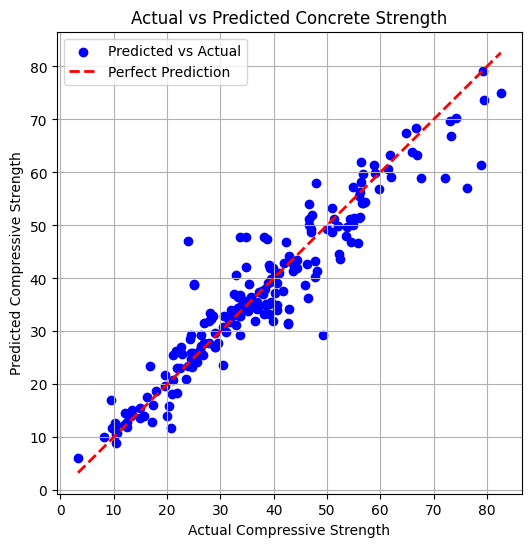

In [15]:
# Plot results
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title("Actual vs Predicted Concrete Strength")
plt.legend()
plt.grid(True)
plt.show()

🔮 7. Predict with Custom Input

# Try model prediction with your inputs:
| Feature                | Description                         | Typical Range (kg/m³ or days) | Notes                                                              |
| ---------------------- | ----------------------------------- | ----------------------------- | ------------------------------------------------------------------ |
| **Cement**             | Binder material                     | **100 – 500**                 | Common mixes use 250–400                                           |
| **Blast Furnace Slag** | Supplementary cementitious material | **0 – 300**                   | Often used in blended cements                                      |
| **Fly Ash**            | Supplementary cementitious material | **0 – 200**                   | Used to replace cement partially                                   |
| **Water**              | Mixing water                        | **120 – 250**                 | Crucial for workability and strength                               |
| **Superplasticizer**   | Chemical admixture                  | **0 – 30**                    | Typically a small percentage                                       |
| **Coarse Aggregate**   | Larger stones                       | **800 – 1150**                | Determines bulk of volume                                          |
| **Fine Aggregate**     | Sand and fine particles             | **600 – 1000**                | Affects finish and compaction                                      |
| **Age (day)**          | Curing time                         | **1 – 365**                   | Strength increases with age, usually measured at 7, 28, or 90 days |



In [16]:
# Input
cement = float(input("Cement: "))
slag = float(input("Blast Furnace Slag: "))
flyash = float(input("Fly Ash: "))
water = float(input("Water: "))
superp = float(input("Superplasticizer: "))
coarse = float(input("Coarse Aggregate: "))
fine = float(input("Fine Aggregate: "))
age = float(input("Age: "))

new_data = pd.DataFrame([[cement, slag, flyash, water, superp, coarse, fine, age]],
                        columns=X.columns)

prediction = model.predict(new_data)[0]
print(f"Predicted Compressive Strength: {prediction:.2f} MPa")

Cement: 450
Blast Furnace Slag: 200
Fly Ash: 100
Water: 180
Superplasticizer: 20
Coarse Aggregate: 1000
Fine Aggregate: 900
Age: 56
Predicted Compressive Strength: 66.09 MPa
